In [1]:
import torch
from diffusers import StableDiffusionXLPipeline
from PIL import Image
import matplotlib.pyplot as plt

/root/miniconda3/envs/sdxl/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load SDXL pipeline
print("Loading SDXL model...")
pipe = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True
).to('cuda')

# Enable optimizations
# pipe.enable_model_cpu_offload()
# pipe.enable_attention_slicing(1)
# pipe.enable_vae_slicing()

print("✓ Model loaded successfully!")

Loading SDXL model...


Loading pipeline components...: 100%|██████████| 7/7 [00:09<00:00,  1.38s/it]


✓ Model loaded successfully!


In [3]:
# Set your prompt here
text = "a blue sks plush toy running in the park"
prompt = f"comic {text}. graphic illustration, comic art, graphic novel art, vibrant, highly detailed"

# Generation parameters
negative_prompt = "monochrome, black and white, grayscale, photograph, deformed, glitch, noisy, realistic, stock photo, lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry"
num_inference_steps = 50
guidance_scale = 5.0
height = 1024
width = 1024
seed = 42

In [4]:
# Generate image
print(f"Generating image...\nPrompt: {text}")

generator = torch.Generator(device="cuda").manual_seed(seed)

image = pipe(
    prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    height=height,
    width=width,
    generator=generator
).images[0]

print("✓ Image generated!")

Generating image...
Prompt: a blue sks plush toy running in the park


100%|██████████| 50/50 [00:07<00:00,  6.46it/s]


✓ Image generated!


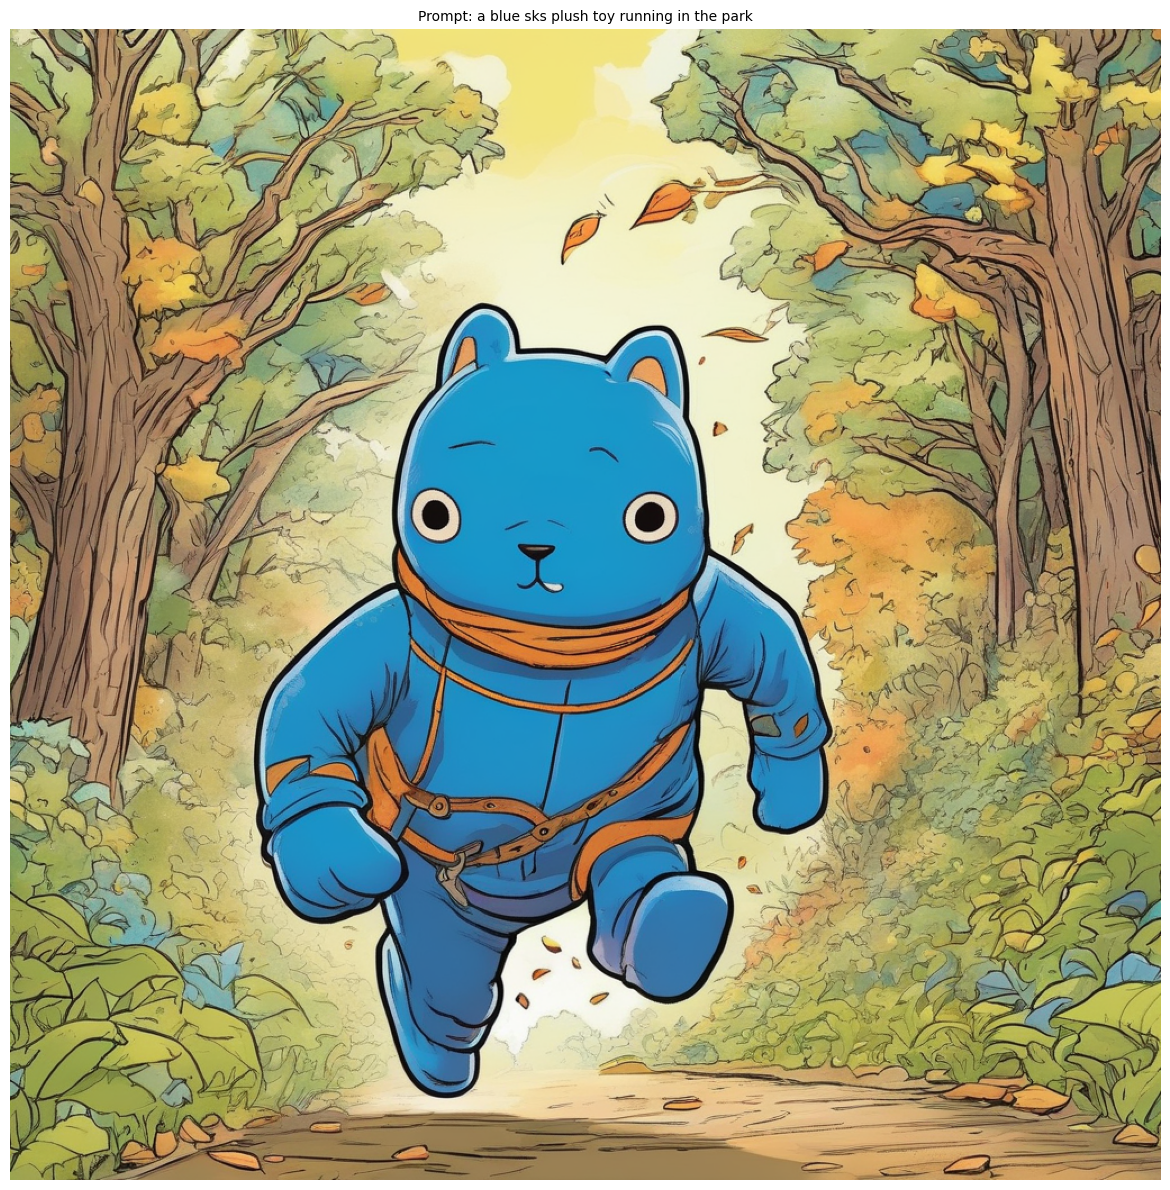

In [5]:
# Display image
plt.figure(figsize=(12, 12))
plt.imshow(image)
plt.axis('off')
plt.title(f"Prompt: {text}", fontsize=10, wrap=True)
plt.tight_layout()
plt.show()

In [6]:
# Save image (optional)
output_path = "sdxl_output.png"
image.save(output_path)
print(f"✓ Image saved to {output_path}")

✓ Image saved to sdxl_output.png
